In [1]:
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install torch_geometric 
### Comment line below if in Google Colab environment
import os
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-vujjinfe
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-vujjinfe
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit e14966ab7217743ea7d626cad6b89636762b21f1
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=29439 sha256=632281a9ac3c27c72b057b427607e49be6cae6422a43c3d1709da8ff7b3adb4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-q8w24h0o/wheels/3f/90/fb/833529540c1d5f19c385fde761cc07c664c4b9a5edf7c6735b
Successfully built bregClust
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 15.0 MB/s eta 0:00:00
  Installing b

In [2]:
from BregmanTests.benchmark import *
n_average = 1
n = 300
n_clusters = 3
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )


Accessing /usr/local/lib/python3.10/dist-packages/BregmanTests/install_algos.sh
Installing R packages...
 This step takes about 5 min...



(as ‘lib’ is unspecified)







































	‘/tmp/RtmpIeCrnZ/downloaded_packages’



In [3]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
scores = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_gpu=True)\
                  .run_real_data()

Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!


Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


In [4]:
scores

{'dataset': ['Cora', 'CiteSeer', 'Cornell', 'Texas', 'Wisconsin'],
 'ARI': [-0.0061237378000671555,
  0.00046107549653045323,
  0.15344091761458076,
  0.31179062987321177,
  0.2149552412911849]}

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,13,10)
r_range = np.linspace(0,0.62,10)*np.log(n)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_gpu=True)\
                  .run_2_1(n_average=10,
                            cluster_sizes=sizes,
                            b=5,
                            a_range=a_range,
                            r_range = r_range,
                            dense=False,
                            plot_3d=False,
                            binary=True)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

0it [00:00, ?it/s]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


1it [01:46, 106.81s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


2it [03:30, 105.15s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes


3it [05:15, 104.97s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


4it [07:00, 105.04s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


5it [08:44, 104.50s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


6it [10:30, 105.14s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


7it [12:14, 104.76s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


8it [13:59, 104.79s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


9it [15:43, 104.54s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


10it [17:28, 104.55s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


11it [19:12, 104.54s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


12it [20:57, 104.77s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


13it [22:43, 105.13s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes


14it [24:28, 105.09s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


15it [26:13, 105.07s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


16it [27:59, 105.16s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


17it [29:42, 104.64s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


18it [31:27, 104.86s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


19it [33:11, 104.41s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


20it [34:56, 104.55s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


21it [36:40, 104.34s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


22it [38:26, 104.85s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


23it [40:11, 105.10s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes


24it [41:57, 105.24s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


25it [43:42, 105.07s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


26it [45:28, 105.50s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


27it [47:12, 105.11s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


28it [48:57, 105.15s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


29it [50:44, 105.44s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


30it [52:28, 105.13s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


31it [54:14, 105.43s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


32it [55:59, 105.29s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


33it [57:45, 105.55s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


34it [59:29, 105.07s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


35it [1:01:16, 105.59s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


36it [1:03:00, 105.20s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


37it [1:04:47, 105.69s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


38it [1:06:32, 105.47s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


39it [1:08:18, 105.65s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


40it [1:10:03, 105.34s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


41it [1:11:49, 105.55s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


42it [1:13:32, 104.99s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


43it [1:15:20, 105.64s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


44it [1:17:05, 105.70s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


45it [1:18:52, 105.91s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


46it [1:20:38, 105.91s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


47it [1:22:23, 105.58s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


48it [1:24:09, 105.81s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


49it [1:25:55, 105.79s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


50it [1:27:40, 105.70s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


51it [1:29:25, 105.53s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


52it [1:31:04, 103.51s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


53it [1:32:50, 104.13s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


54it [1:34:36, 104.81s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


55it [1:36:21, 104.97s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


56it [1:38:08, 105.36s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


57it [1:39:53, 105.22s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


58it [1:41:40, 105.86s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


59it [1:43:25, 105.75s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


60it [1:45:11, 105.85s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


61it [1:46:59, 106.31s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


62it [1:48:44, 106.10s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


63it [1:50:32, 106.37s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


64it [1:52:18, 106.40s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


65it [1:54:04, 106.43s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


66it [1:55:49, 105.94s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


67it [1:57:36, 106.17s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


68it [1:59:21, 105.89s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


69it [2:01:09, 106.58s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


70it [2:02:56, 106.61s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


71it [2:04:41, 106.18s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


72it [2:06:29, 106.62s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


73it [2:08:05, 103.61s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


74it [2:09:35, 99.47s/it] 

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


75it [2:11:20, 101.08s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


76it [2:13:08, 103.04s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


77it [2:14:54, 103.94s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes


78it [2:16:39, 104.33s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


79it [2:18:27, 105.34s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


80it [2:20:13, 105.65s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


81it [2:22:00, 105.88s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


82it [2:23:45, 105.79s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


83it [2:25:31, 105.83s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


84it [2:27:17, 105.90s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


85it [2:29:04, 106.08s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


86it [2:30:50, 106.06s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


87it [2:32:35, 105.84s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


88it [2:34:23, 106.40s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


89it [2:36:07, 105.91s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


90it [2:37:55, 106.29s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


91it [2:39:41, 106.38s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


92it [2:41:26, 106.04s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


93it [2:43:14, 106.54s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


94it [2:44:54, 104.62s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


95it [2:46:42, 105.54s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


96it [2:48:29, 105.99s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


97it [2:50:16, 106.18s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


98it [2:51:54, 103.82s/it]

(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the graph


99it [2:53:39, 104.10s/it]

(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the graph
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes
(300, 300, 1)
Initialisation chosen from the attributes


100it [2:55:25, 105.26s/it]


In [7]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,13,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_gpu=True
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

0it [00:00, ?it/s]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


1it [01:26, 86.27s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


2it [03:11, 97.29s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


3it [04:43, 94.95s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


4it [06:11, 92.09s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


5it [07:56, 96.96s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


6it [09:00, 85.59s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


7it [10:06, 79.36s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


8it [11:52, 87.86s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


9it [13:20, 87.81s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph


10it [14:50, 88.49s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


11it [16:27, 91.22s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


12it [17:39, 85.36s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


13it [19:08, 86.24s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


14it [20:36, 86.97s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


15it [22:13, 89.76s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


16it [23:33, 86.90s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


17it [24:59, 86.72s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


18it [26:21, 85.22s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


19it [27:46, 85.22s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


20it [29:10, 84.68s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


21it [30:39, 86.01s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


22it [31:56, 83.54s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


23it [33:27, 85.52s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


24it [34:54, 86.04s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


25it [36:05, 81.68s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


26it [37:37, 84.58s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


27it [39:09, 87.06s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


28it [40:39, 87.67s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


29it [42:14, 89.86s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


30it [43:47, 91.05s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


31it [45:23, 92.56s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


32it [47:11, 97.04s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


33it [48:29, 91.40s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


34it [50:06, 92.88s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


35it [51:17, 86.55s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph


36it [52:46, 87.12s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


37it [53:53, 81.11s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


38it [54:59, 76.64s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


39it [56:04, 73.24s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


40it [57:40, 79.93s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


41it [59:10, 82.84s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


42it [1:00:34, 83.38s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


43it [1:02:02, 84.86s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


44it [1:03:38, 88.03s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


45it [1:04:51, 83.43s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


46it [1:06:24, 86.35s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes


47it [1:07:56, 88.21s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


48it [1:09:26, 88.70s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


49it [1:11:06, 92.10s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


50it [1:12:42, 93.14s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


51it [1:14:28, 97.12s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


52it [1:16:13, 99.46s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


53it [1:17:39, 95.26s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


54it [1:19:21, 97.32s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


55it [1:20:55, 96.49s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes


56it [1:22:34, 97.24s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


57it [1:24:01, 93.95s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


58it [1:25:17, 88.61s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


59it [1:26:39, 86.67s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


60it [1:28:04, 86.32s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


61it [1:29:48, 91.53s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


62it [1:31:30, 94.53s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


63it [1:33:10, 96.35s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


64it [1:34:55, 98.76s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


65it [1:36:40, 100.85s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


66it [1:38:07, 96.52s/it] 

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


67it [1:39:26, 91.29s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


68it [1:40:28, 82.63s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


69it [1:41:51, 82.78s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


70it [1:42:59, 78.19s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


71it [1:44:44, 86.25s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


72it [1:46:25, 90.79s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


73it [1:48:11, 95.23s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


74it [1:49:56, 98.12s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


75it [1:51:41, 100.24s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph


76it [1:53:08, 96.38s/it] 

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


77it [1:54:29, 91.71s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


78it [1:55:29, 82.23s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


79it [1:56:46, 80.67s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


80it [1:57:50, 75.58s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


81it [1:59:32, 83.59s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


82it [2:01:16, 89.61s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


83it [2:02:48, 90.50s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


84it [2:04:34, 94.92s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


85it [2:06:08, 94.74s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


86it [2:07:53, 97.86s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


87it [2:09:16, 93.34s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


88it [2:10:26, 86.45s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


89it [2:11:44, 83.83s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


90it [2:12:50, 78.45s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


91it [2:14:23, 82.93s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


92it [2:16:05, 88.46s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


93it [2:17:39, 90.20s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


94it [2:19:07, 89.53s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


95it [2:20:47, 92.64s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


96it [2:22:33, 96.64s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


97it [2:23:46, 89.59s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


98it [2:24:46, 80.90s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


99it [2:25:46, 74.45s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


100it [2:27:03, 75.22s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


101it [2:28:50, 84.67s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


102it [2:30:17, 85.47s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


103it [2:32:02, 91.49s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


104it [2:33:36, 92.11s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


105it [2:34:45, 85.11s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


106it [2:36:24, 89.37s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


107it [2:37:52, 88.91s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


108it [2:39:09, 85.38s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


109it [2:40:16, 79.92s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


110it [2:41:15, 73.69s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


111it [2:43:02, 83.61s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


112it [2:44:45, 89.40s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


113it [2:46:24, 92.20s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


114it [2:48:11, 96.74s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


115it [2:49:58, 99.78s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


116it [2:51:32, 97.90s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


117it [2:52:52, 92.69s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


118it [2:53:47, 81.45s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


119it [2:54:56, 77.74s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


120it [2:56:19, 79.21s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


121it [2:58:05, 87.07s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


122it [2:59:50, 92.67s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


123it [3:01:30, 94.76s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


124it [3:03:09, 95.93s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


125it [3:04:51, 97.79s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


126it [3:06:23, 96.25s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


127it [3:07:40, 90.45s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


128it [3:08:39, 80.99s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


129it [3:09:48, 77.46s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


130it [3:11:07, 77.77s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


131it [3:12:49, 85.10s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


132it [3:14:19, 86.70s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


133it [3:16:04, 92.09s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


134it [3:17:36, 92.02s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


135it [3:19:15, 93.98s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


136it [3:20:57, 96.55s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


137it [3:22:05, 87.91s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


138it [3:23:30, 87.10s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


139it [3:24:45, 83.45s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


140it [3:25:53, 78.90s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


141it [3:27:39, 87.03s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


142it [3:29:12, 88.75s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


143it [3:30:46, 90.32s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


144it [3:32:19, 91.02s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


145it [3:33:52, 91.72s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


146it [3:35:19, 90.23s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


147it [3:36:26, 83.46s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


148it [3:37:15, 73.07s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


149it [3:38:32, 74.05s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


150it [3:39:27, 68.33s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


151it [3:40:55, 74.46s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


152it [3:42:30, 80.46s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


153it [3:44:15, 87.91s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


154it [3:45:53, 91.04s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


155it [3:47:30, 92.71s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


156it [3:48:56, 90.67s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


157it [3:49:54, 80.93s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


158it [3:50:39, 70.16s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


159it [3:51:33, 65.24s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


160it [3:52:21, 59.94s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


161it [3:54:05, 73.28s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


162it [3:55:35, 78.43s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


163it [3:57:22, 86.98s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


164it [3:58:57, 89.14s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


165it [4:00:31, 90.73s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


166it [4:01:44, 85.32s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


167it [4:02:46, 78.53s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


168it [4:04:08, 79.50s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


169it [4:05:07, 73.24s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


170it [4:05:48, 63.69s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


171it [4:07:32, 75.59s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


172it [4:09:12, 83.09s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


173it [4:10:57, 89.55s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


174it [4:12:39, 93.34s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


175it [4:14:05, 91.29s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


176it [4:15:23, 87.06s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


177it [4:16:28, 80.55s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


178it [4:17:19, 71.74s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


179it [4:18:23, 69.50s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


180it [4:18:57, 58.84s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


181it [4:20:36, 70.65s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


182it [4:22:18, 80.03s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


183it [4:23:56, 85.55s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


184it [4:25:24, 86.45s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


185it [4:27:04, 90.38s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


186it [4:28:32, 89.71s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


187it [4:29:28, 79.45s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


188it [4:30:43, 78.17s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


189it [4:31:48, 74.11s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


190it [4:32:41, 67.83s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


191it [4:34:18, 76.82s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


192it [4:35:53, 82.01s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


193it [4:37:38, 89.11s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


194it [4:39:12, 90.42s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


195it [4:40:47, 91.77s/it]

Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes


196it [4:42:08, 88.52s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


197it [4:43:12, 81.24s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


198it [4:44:18, 76.59s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


199it [4:45:15, 70.76s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


200it [4:45:54, 85.77s/it]


In [8]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
d_range = np.arange(1,5)
mu_range = np.linspace(0,5,10)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_gpu=True
                  )\
                  .run_2_2(n_average=10,
                            cluster_sizes=sizes,
                             d_range = d_range,
                             mu_range = mu_range,
                             dense=True,
                             binary=False)
with open('test_2_2.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

0it [00:00, ?it/s]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


1it [00:16, 16.72s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


2it [00:31, 15.51s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes


3it [00:46, 15.19s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


4it [01:01, 15.25s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


5it [01:27, 18.96s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


6it [01:42, 17.89s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


7it [02:00, 17.84s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


8it [02:24, 19.72s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


9it [02:40, 18.54s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


10it [03:05, 20.59s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


11it [03:21, 19.05s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph


12it [03:56, 23.92s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


13it [04:21, 24.50s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


14it [04:45, 24.17s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


15it [05:02, 22.16s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


16it [05:28, 23.15s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


17it [05:45, 21.49s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


18it [06:01, 19.72s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


19it [06:16, 18.37s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


20it [06:32, 17.72s/it]

Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


21it [06:48, 17.09s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph


22it [07:06, 17.32s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


23it [07:25, 17.77s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


24it [07:41, 17.43s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


25it [07:57, 16.85s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


26it [08:17, 17.86s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


27it [08:33, 17.18s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


28it [08:48, 16.75s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


29it [09:06, 17.00s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


30it [09:22, 16.61s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


31it [09:39, 16.87s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


32it [09:56, 16.77s/it]

Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the attributes
Initialisation chosen from the graph


33it [10:23, 20.02s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes


34it [10:40, 19.15s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


35it [10:56, 18.18s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


36it [11:23, 20.67s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the attributes
Initialisation chosen from the graph
Initialisation chosen from the graph


37it [11:40, 19.53s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


38it [11:56, 18.59s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


39it [12:12, 17.68s/it]

Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph
Initialisation chosen from the graph


40it [12:27, 18.70s/it]


In [9]:
from BregmanTests.utils import *

In [11]:
test_2_1=None
with open("test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

dict_keys(['a', 'r', 'ARI'])

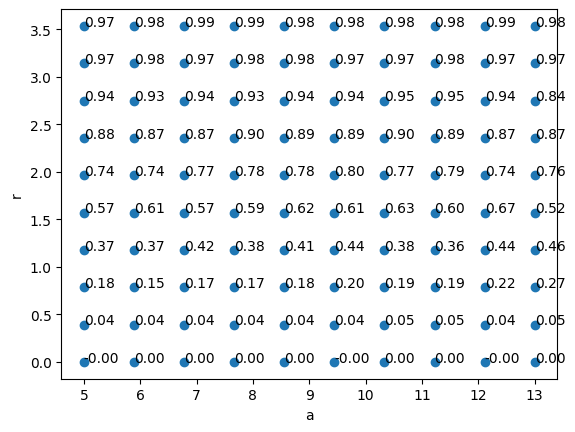

In [35]:
def scatter_(dict_,x_name,y_name,z_name):
  fig, ax = plt.subplots()
  x,y = dict_[x_name],dict_[y_name]
  ax.scatter(x,y)
  for i, txt in enumerate(dict_[z_name]):
      ax.annotate("{:.2f}".format(txt), (x[i], y[i]))
  ax.set_xlabel(x_name)
  ax.set_ylabel(y_name)
scatter_(test_2_1,'a', 'r', 'ARI')

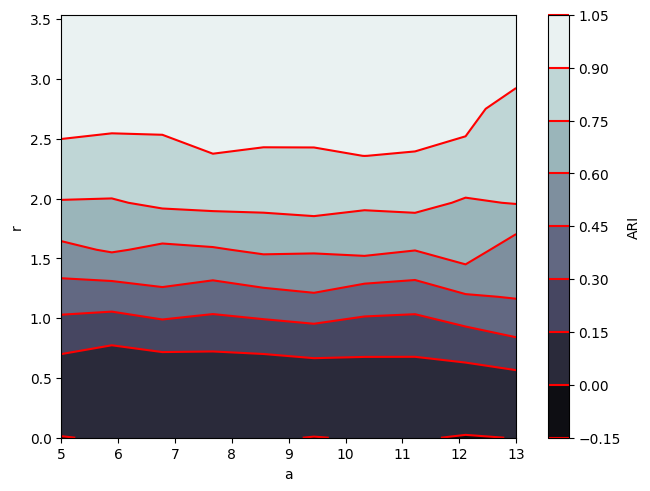

In [31]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(-1,vals_y.shape[0])
y = np.array(y).reshape(-1,vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg",plot_3d=False)

In [32]:
test_2_2=None
with open("test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

dict_keys(['d', 'mu', 'ARI'])

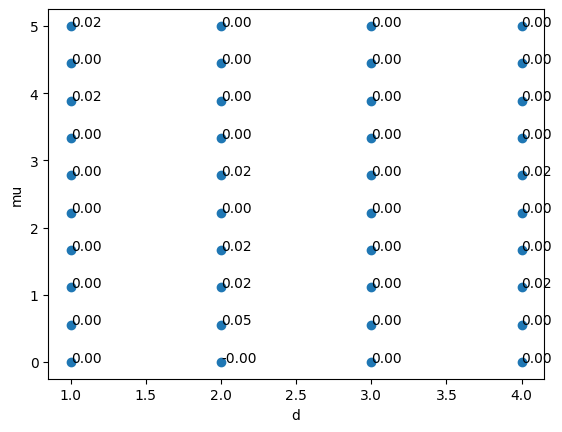

In [36]:
scatter_(test_2_2,'d', 'mu', 'ARI')

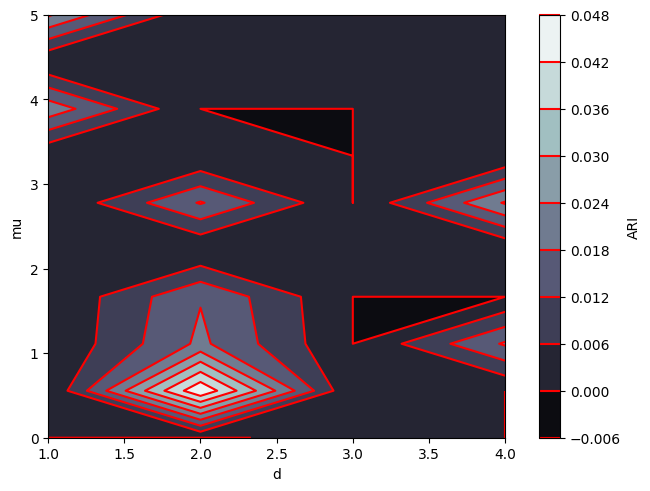

In [37]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(-1,vals_y.shape[0])
y = np.array(y).reshape(-1,vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg",plot_3d=False)

In [39]:
test_2_3=None
with open("test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

dict_keys(['d', 'lambda', 'a', 'ARI'])

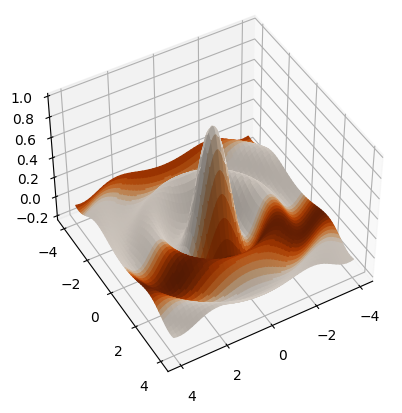

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create some fake data
x = y = np.arange(-4.0, 4.0, 0.02)
# here are the x,y and respective z values
X, Y = np.meshgrid(x, y)
Z = np.sinc(np.sqrt(X*X+Y*Y))
# this is the value to use for the color
V = np.sin(Y)

# create the figure, add a 3d axis, set the viewing angle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,60)

# here we create the surface plot, but pass V through a colormap
# to create a different color for each patch
ax.plot_surface(X, Y, Z, facecolors=cm.Oranges(V))

In [47]:
X.shape,Y.shape,Z.shape

((400, 400), (400, 400), (400, 400))

In [ ]:
x,y,z,v = test_2_3["d"],test_2_3["lambda"],test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
x,y,z = np.meshgrid(vals_x,vals_y,vals_z)
v = np.array(v).reshape((len(vals_x),len(vals_y),len(vals_z)))
make_4d_plot(x,y,z,v,x_label="d",y_label="lambda",z_label="a",filename="contour_plot_2_3.jpeg")